### **The GIL and its effects on Python multithreading**: contains an extensive study on performance effects caused by the Global Interpreter Lock (GIL): [GIL Behind The Scenes](https://tenthousandmeters.com/blog/python-behind-the-scenes-13-the-gil-and-its-effects-on-python-multithreading/#:~:text=The%20GIL%20allows%20only%20one,negative%20effect%20of%20the%20GIL.).

In [14]:
import math, time, urllib.request
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [15]:
def multi_threading(func, args, workers):
    with ThreadPoolExecutor(workers) as ex:
        # creates a pool of threads and assigns func/args
        # to each
        res = ex.map(func, args)
    return list(res)

def multi_processing(func, args, workers):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

## Multithreading: I/O intensive tasks

In [34]:
addrs = ['http://www.poatek.com', 'https://www.poatek.com/team/', 'https://www.poatek.com/blog/',
    'https://www.poatek.com/our-method/', 'https://www.poatek.com/services/', 'https://en.wikipedia.org/wiki/Main_Page', 
    'https://www.google.com/', 'https://www.kaggle.com/competitions', 'https://www.amazon.com/charts/mostread/fiction/', 
    'https://www.amazon.com/charts/mostread/nonfiction', 'https://www.amazon.com/charts/mostsold/nonfiction', 
    'https://www.amazon.com/charts/mostsold/fiction', 'https://www.nytimes.com', 'https://www.bbc.com/', 
    'https://www.lemonde.fr', 'https://edition.cnn.com',]

def io_intensive(x):
    write_count = 50
    with urllib.request.urlopen(addrs[x], timeout=20) as conn:
        page = conn.read()
        for _ in range(write_count):
            with open("output.txt", "w") as output:
                output.write(str(page))

def test_io_intensive_threads(thread_count_lst, addrs):
    times = []
    num_tasks = len(addrs)

    # single thread execution
    time_init = time.time()
    for i in range(num_tasks):
        io_intensive(i)
    time_end = time.time()
    times.append(float(time_end - time_init))
    print(f"Serial execution took {time_end - time_init}s.")

    # n-threaded execution
    for n_threads in thread_count_lst:
        time_init = time.time()
        multi_threading(io_intensive, range(num_tasks), n_threads)
        time_end = time.time()
        times.append(float(time_end - time_init))
        print(f"Multithreading with {n_threads} threads "
        f"took {time_end - time_init}s.")
    return times

In [35]:
times = test_io_intensive_threads([2, 4, 8, 16], addrs)

Serial execution took 26.156383991241455s.
Multithreading with 2 threads took 12.455011367797852s.
Multithreading with 4 threads took 6.1380956172943115s.
Multithreading with 8 threads took 4.347453355789185s.
Multithreading with 16 threads took 2.822296142578125s.


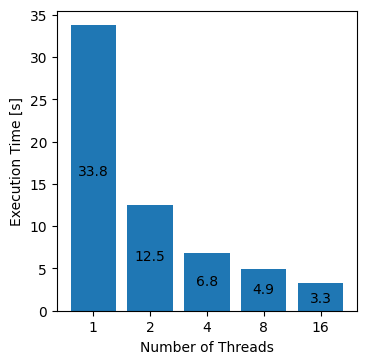

In [31]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Execution Time [s]')
num_threads = ['1', '2', '4', '8', '16']
ax.bar(num_threads, times)

addlabels(num_threads, [round(x, 1) for x in times])
plt.show()

In [38]:
def compute_intensive(x):
    foo = 0
    for i in range(10**7):
        foo += foo * math.cos(i*math.pi)

def test_compute_intensive():
    times = []
    num_tasks = 4

    # single thread execution
    time_init = time.time()
    for i in range(num_tasks):
        compute_intensive(i)
    time_end = time.time()
    times.append(float(time_end - time_init))
    print(f"Serial execution took {time_end - time_init}s.")
    
    # n-threaded execution
    n_threads = num_tasks
    time_init = time.time()
    multi_threading(compute_intensive, range(num_tasks), n_threads)
    time_end = time.time()
    times.append(float(time_end - time_init))
    print(f"Multithreaded w {n_threads} threads took "
    f"{time_end - time_init}s.")

    # multiprocessing execution
    time_init = time.time()
    n_procs = num_tasks
    multi_processing(compute_intensive, range(num_tasks), n_procs)
    time_end = time.time()
    times.append(float(time_end - time_init))
    print(f"Multiprocessing w {n_procs} processes took {time_end - time_init}s.")
    return times

In [39]:
times = test_compute_intensive()

Serial execution took 6.373517274856567s.
Multithreaded w 4 threads took 23.539126873016357s.
Multiprocessing w 4 processes took 1.990689992904663s.


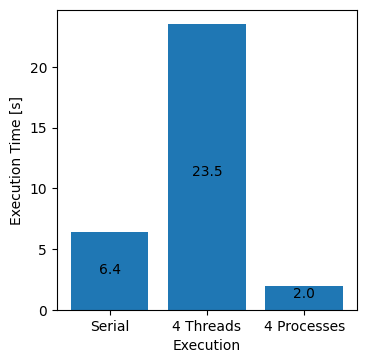

In [40]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Execution')
ax.set_ylabel('Execution Time [s]')
num_threads = ['Serial', '4 Threads', '4 Processes']
ax.bar(num_threads, times)

addlabels(num_threads, [round(x, 1) for x in times])
plt.show()